In [1]:
import sys
sys.path.append("../src")

In [2]:
import pandas as pd
from data_processing import my_pipeline

In [3]:
def load_data(path):
    try:
        df = pd.read_csv(path)
        return df
    except FileNotFoundError as e: 
        print(e)
    except:
        print("Could not upload the data")

In [4]:
path = "../data/raw/training.csv"
df = load_data(path)

In [5]:
processed_data = my_pipeline.fit_transform(df)

c:\Users\HP\OneDrive\Desktop\Tenx\Credit-Scoring-Model\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HP\OneDrive\Desktop\Tenx\Credit-Scoring-Model\notebook\../src\data_processing.py:133: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  IV_df = pd.concat([
c:\Users\HP\OneDrive\Desktop\Tenx\Credit-Scoring-Model\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HP\OneDrive\Desktop\Tenx\Credit-Scoring-Model\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = g

In [6]:
feature_names = my_pipeline.named_steps['columntransformer'].get_feature_names_out()
processed_df = pd.DataFrame(processed_data, columns=feature_names)

In [7]:
processed_df.head()

,num__Total_Amount,num__Average_Amount,num__Transaction_Count,num__Std_Amount,cat__is_high_risk
0,-10000.0,-10000.000000,1.0,0.000000,1.0
1,-10000.0,-10000.000000,1.0,0.000000,1.0
2,20000.0,4000.000000,5.0,6558.963333,1.0
3,4225.0,384.090909,11.0,560.498966,0.0
4,20000.0,3333.333333,6.0,6030.478146,0.0


In [8]:
from sklearn.preprocessing import LabelEncoder
categorical_features = [ "cat__ChannelId", "cat__ProviderId" ,"cat__is_high_risk"]
for col in categorical_features:
    processed_df[col] = LabelEncoder().fit_transform(processed_df[col])

KeyError: 'cat__ChannelId'

In [ ]:
processed_df.head()

,num__Total_Amount,num__Average_Amount,num__Transaction_Count,num__Std_Amount,cat__ChannelId,cat__ProviderId,cat__is_high_risk
0,-10000.0,-10000.0,1.0,0.0,1,3,1
1,-10000.0,-10000.0,1.0,0.0,1,3,1
2,20000.0,4000.0,5.0,6558.963333,2,3,1
3,4225.0,384.090909,11.0,560.498966,1,3,0
4,20000.0,3333.333333,6.0,6030.478146,2,5,0


In [ ]:
def to_catagorical(df):
    df['PricingStrategy'] = pd.Categorical(df['PricingStrategy'])
    df['ChannelId'] = pd.Categorical(df['ChannelId'])
    df['ProductCategory'] = pd.Categorical(df['ProductCategory'])
    df['ProductId'] = pd.Categorical(df['ProductId'])
    df['ProviderId'] = pd.Categorical(df['ProviderId'])
    #print(df.head())

In [ ]:
to_catagorical(df)

In [ ]:
def top(x):
    return x.mode().iloc[0]
def wraggle(df):
    # normalize the date column and extract dates
    df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])
    df["transaction_month"] = df["TransactionStartTime"].dt.month
    df["transaction_day"] = df["TransactionStartTime"].dt.day
    df["transaction_year"] = df["TransactionStartTime"].dt.year
    df["transaction_hour"] = df["TransactionStartTime"].dt.hour

    #sort the data based on date
    df.sort_values("TransactionStartTime", inplace=True)

    # compute the amount of transaction
    num_df = df.groupby("CustomerId").agg({
    "Amount": ["sum", "mean", "count", "std"] ,
     "FraudResult": "max"
    }).reset_index()

    cat_df = df.groupby("CustomerId").agg({
     "ProductCategory" :top,
     "ChannelId" :top,
     "ProviderId" :top,
    }).reset_index()
    
    num_df.columns = [ "CustomerId", "Total_Amount" , "Average_Amount" , "Transaction_Count" , "Std_Amount" , "Has_Fraud"] 
    
    processed_df = pd.merge(num_df, cat_df , on ="CustomerId" , how = "inner")
    return processed_df

In [ ]:
processed_df = wraggle(df)

In [ ]:
processed_df.head()

,CustomerId,Total_Amount,Average_Amount,Transaction_Count,Std_Amount,Has_Fraud,ProductCategory,ChannelId,ProviderId
0,CustomerId_1,-10000.0,-10000.000000,1,NaN,0,airtime,ChannelId_2,ProviderId_4
1,CustomerId_10,-10000.0,-10000.000000,1,NaN,0,airtime,ChannelId_2,ProviderId_4
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,0,financial_services,ChannelId_3,ProviderId_4
3,CustomerId_1002,4225.0,384.090909,11,560.498966,0,financial_services,ChannelId_2,ProviderId_4
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,0,airtime,ChannelId_3,ProviderId_6


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerId         3742 non-null   object  
 1   Total_Amount       3742 non-null   float64 
 2   Average_Amount     3742 non-null   float64 
 3   Transaction_Count  3742 non-null   int64   
 4   Std_Amount         3030 non-null   float64 
 5   Has_Fraud          3742 non-null   int64   
 6   ProductCategory    3742 non-null   category
 7   ChannelId          3742 non-null   category
 8   ProviderId         3742 non-null   category
dtypes: category(3), float64(3), int64(2), object(1)
memory usage: 187.3+ KB


In [ ]:
processed_df["Std_Amount"] = processed_df["Std_Amount"].apply(lambda x: 0 if pd.isna(x) else x)

In [ ]:
processed_df.isnull().sum()

CustomerId           0
Total_Amount         0
Average_Amount       0
Transaction_Count    0
Std_Amount           0
Has_Fraud            0
ProductCategory      0
ChannelId            0
ProviderId           0
dtype: int64

In [ ]:
from dateutil.relativedelta import relativedelta
original_date = df["TransactionStartTime"].max()

In [ ]:
snapshot_date = original_date - relativedelta(months=3)

In [ ]:
def rsm(df , months=3):
 
    snapshot_date = df["TransactionStartTime"].max()
    
    recent_period = snapshot_date - relativedelta(months=months)
    
    df_recent = df[df["TransactionStartTime"] >= recent_period]
    rfm = df_recent.groupby("CustomerId").agg({
        "TransactionStartTime": lambda x: (snapshot_date - x.max()).days,
        "CustomerId": "count",
        "Amount": "sum" 
    })
    rfm.columns = ["Recency", "Frequency", "Monetary" ]
    return rfm.reset_index()

In [ ]:
rsm_df = rsm(df)

In [ ]:
rsm_df.head()

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,-10000.0
1,CustomerId_10,83,1,-10000.0
2,CustomerId_1001,89,5,20000.0
3,CustomerId_1002,25,11,4225.0
4,CustomerId_1003,11,6,20000.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rsm_df.drop(columns="CustomerId"))
kmeans = KMeans(n_clusters=3, random_state=42)
rsm_df["Cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
rsm_df.head(10)

,CustomerId,Recency,Frequency,Monetary,Cluster
0,CustomerId_1,83,1,-10000.0,0
1,CustomerId_10,83,1,-10000.0,0
2,CustomerId_1001,89,5,20000.0,0
3,CustomerId_1002,25,11,4225.0,2
4,CustomerId_1003,11,6,20000.0,2
5,CustomerId_1004,52,1,2000.0,0
6,CustomerId_1005,46,9,48800.0,0
7,CustomerId_1006,64,1,1000.0,0
8,CustomerId_1007,81,1,28000.0,0
9,CustomerId_1008,65,2,20000.0,0


In [ ]:
cluster_summary = rsm_df.groupby("Cluster")[["Frequency", "Monetary", "Recency"]].mean()
sorted_clusters = cluster_summary.sort_values(by=["Frequency", "Monetary", "Recency"], ascending=[True, True, False])
high_risk_cluster = sorted_clusters.index[0]

In [ ]:
high_risk_cluster

np.int32(0)

In [ ]:
rsm_df["is_high_risk"] = (rsm_df["Cluster"] == high_risk_cluster).astype(int)

In [ ]:
rsm_df.head()

,CustomerId,Recency,Frequency,Monetary,Cluster,is_high_risk
0,CustomerId_1,83,1,-10000.0,0,1
1,CustomerId_10,83,1,-10000.0,0,1
2,CustomerId_1001,89,5,20000.0,0,1
3,CustomerId_1002,25,11,4225.0,2,0
4,CustomerId_1003,11,6,20000.0,2,0


In [ ]:
processed_df = pd.merge(processed_df, rsm_df[["is_high_risk" , "CustomerId"]] , on="CustomerId" , how="inner")
processed_df.head()

,CustomerId,Total_Amount,Average_Amount,Transaction_Count,Std_Amount,Has_Fraud,ProductCategory,ChannelId,ProviderId,is_high_risk
0,CustomerId_1,-10000.0,-10000.000000,1,0.000000,0,airtime,ChannelId_2,ProviderId_4,1
1,CustomerId_10,-10000.0,-10000.000000,1,0.000000,0,airtime,ChannelId_2,ProviderId_4,1
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,0,financial_services,ChannelId_3,ProviderId_4,1
3,CustomerId_1002,4225.0,384.090909,11,560.498966,0,financial_services,ChannelId_2,ProviderId_4,0
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,0,airtime,ChannelId_3,ProviderId_6,0


In [ ]:
import numpy as np

In [ ]:
# Function to compute Weight of Evidence
# Source: 
# http://www.sanaitics.com/UploadedFiles/html_files/1770WoE_RvsPython.html

def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Bin Values': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & 
                    (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & 
                    (dataset[target] == 1)].count()[feature]
        }) 
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by='WoE')
    return dset, iv

In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerId         3742 non-null   object  
 1   Total_Amount       3742 non-null   float64 
 2   Average_Amount     3742 non-null   float64 
 3   Transaction_Count  3742 non-null   int64   
 4   Std_Amount         3742 non-null   float64 
 5   Has_Fraud          3742 non-null   int64   
 6   ProductCategory    3742 non-null   category
 7   ChannelId          3742 non-null   category
 8   ProviderId         3742 non-null   category
 9   is_high_risk       3742 non-null   int64   
dtypes: category(3), float64(3), int64(3), object(1)
memory usage: 216.5+ KB


In [ ]:
import pandas as pd
processed_copy_df = processed_df.copy()
# Create binned versions of your continuous numeric features
processed_copy_df['Total_Amount_bin'] = pd.qcut(processed_copy_df['Total_Amount'], 10, duplicates='drop')
processed_copy_df['Average_Amount_bin'] = pd.qcut(processed_copy_df['Average_Amount'], 10, duplicates='drop')
processed_copy_df['Transaction_Count_bin'] = pd.qcut(processed_copy_df['Transaction_Count'], 10, duplicates='drop')
processed_copy_df['Std_Amount_bin'] = pd.qcut(processed_copy_df['Std_Amount'], 10, duplicates='drop')

# Combine all into a single processed_copy_dfFrame for IV calculation
processed_copy_df_woe = processed_copy_df[['Total_Amount_bin', 'Average_Amount_bin', 'Transaction_Count_bin',
                 'Std_Amount_bin', 'ProductCategory', 'ChannelId', 'ProviderId', 'is_high_risk']]


In [ ]:
lst = []
IV_df = pd.DataFrame(columns=['Variable', 'IV'])

for col in processed_copy_df.columns:
    if col == 'is_high_risk':
        continue
    df_iv, iv = calculate_woe_iv(processed_copy_df, col, 'is_high_risk')
    lst.append(df_iv)

    # Use concat instead of append
    IV_df = pd.concat([
        IV_df,
        pd.DataFrame([{"Variable": col, "IV": iv}])
    ], ignore_index=True)


c:\Users\HP\Desktop\Tenx\Credit-Scoring-Model\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_9980\1233351878.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  IV_df = pd.concat([
c:\Users\HP\Desktop\Tenx\Credit-Scoring-Model\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HP\Desktop\Tenx\Credit-Scoring-Model\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\HP\Deskt

In [ ]:
IV_df

,Variable,IV
0,CustomerId,0.000000
1,Total_Amount,0.729703
2,Average_Amount,0.736906
3,Transaction_Count,0.632077
4,Std_Amount,0.474377
5,Has_Fraud,0.004283
6,ProductCategory,0.069697
7,ChannelId,0.129423
8,ProviderId,0.276796
9,Total_Amount_bin,0.482700


<Axes: xlabel='Variable'>

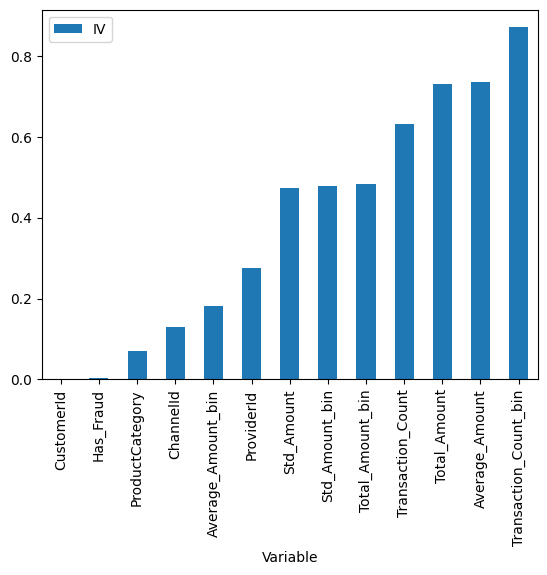

In [ ]:
IV_df.set_index("Variable").sort_values(by="IV").plot(kind="bar")

In [ ]:
cols_to_drop = []
for i in IV_df["IV"]:
    if i < 0.3:
        col= IV_df[IV_df["IV"] == i]["Variable"].values[0]
        cols_to_drop.append(col)
        
cols_to_drop

['CustomerId',
 'Has_Fraud',
 'ProductCategory',
 'ChannelId',
 'ProviderId',
 'Average_Amount_bin']

## 📊 Information Value (IV) Summary

| Variable               | IV       | Predictive Power     |
|------------------------|----------|-----------------------|
| CustomerId             | 0.000000 | Useless               |
| Total_Amount           | 0.729703 | **Suspiciously Predictive** |
| Average_Amount         | 0.736906 | **Suspiciously Predictive** |
| Transaction_Count      | 0.632077 | **Suspiciously Predictive** |
| Std_Amount             | 0.474377 | Strong                |
| Has_Fraud              | 0.004283 | Useless               |
| ProductCategory        | 0.069697 | Weak                  |
| ChannelId              | 0.129423 | Medium                |
| ProviderId             | 0.276796 | Medium                |
| Total_Amount_bin       | 0.482700 | Strong                |
| Average_Amount_bin     | 0.181346 | Medium                |
| Transaction_Count_bin  | 0.871139 | **Suspiciously Predictive** |
| Std_Amount_bin         | 0.478407 | Strong                |

---

### 📈 IV Interpretation Guide

- **< 0.02** → Useless for prediction  
- **0.02 – 0.1** → Weak predictive power  
- **0.1 – 0.3** → Medium predictive power  
- **0.3 – 0.5** → Strong predictive power  
- **> 0.5** → Suspiciously predictive (possible data leakage or overfitting risk)

In [ ]:
processed_df.head()

,CustomerId,Total_Amount,Average_Amount,Transaction_Count,Std_Amount,Has_Fraud,ProductCategory,ChannelId,ProviderId,is_high_risk
0,CustomerId_1,-10000.0,-10000.000000,1,0.000000,0,airtime,ChannelId_2,ProviderId_4,1
1,CustomerId_10,-10000.0,-10000.000000,1,0.000000,0,airtime,ChannelId_2,ProviderId_4,1
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,0,financial_services,ChannelId_3,ProviderId_4,1
3,CustomerId_1002,4225.0,384.090909,11,560.498966,0,financial_services,ChannelId_2,ProviderId_4,0
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,0,airtime,ChannelId_3,ProviderId_6,0
